In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
import math
import matplotlib.pyplot as plt

In [3]:
mnist = read_data_sets("data", one_hot=True, reshape=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
read_data_sets

<function tensorflow.contrib.learn.python.learn.datasets.mnist.read_data_sets(train_dir, fake_data=False, one_hot=False, dtype=tf.float32, reshape=True, validation_size=5000, seed=None, source_url='https://storage.googleapis.com/cvdf-datasets/mnist/')>

In [5]:
X = tf.placeholder(tf.float32, shape=[None, 28, 28, 1])
XX = tf.reshape(X, [-1, 784])
Y = tf.placeholder(tf.float32, shape = [None, 10])
keep_prob=tf.placeholder(tf.float32)

In [23]:
W1 = tf.Variable(tf.random_normal([784, 200], stddev = 0.1))
b1 = tf.Variable(tf.random_normal([200]))
L1 = tf.nn.relu(tf.matmul(XX, W1) + b1)
L1=tf.nn.dropout(L1,keep_prob=keep_prob)

W2 = tf.Variable(tf.random_normal([200,100], stddev = 0.1))
b2 = tf.Variable(tf.random_normal([100]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2=tf.nn.dropout(L2,keep_prob=keep_prob)
    
W3 = tf.Variable(tf.random_normal([100,60], stddev = 0.1))
b3 = tf.Variable(tf.random_normal([60]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3=tf.nn.dropout(L3,keep_prob=keep_prob)

W4 = tf.Variable(tf.random_normal([60,30], stddev = 0.1))
b4 = tf.Variable(tf.random_normal([30]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4=tf.nn.dropout(L4,keep_prob=keep_prob)

W5 = tf.Variable(tf.random_normal([30,10], stddev = 0.1))
b5 = tf.Variable(tf.random_normal([10]))
L5 = tf.nn.relu(tf.matmul(L4, W5) + b5)

H = tf.matmul(L4, W5)+b5

In [24]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = H, labels=Y))

In [25]:
is_correct = tf.equal(tf.argmax(Y,1),tf.argmax(H,1))

In [26]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [27]:
optimizer = tf.train.AdamOptimizer(0.005)
train = optimizer.minimize(cost)

In [28]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
i_val = []
cost_val = []
accuracy_val = []

In [29]:
for i in range(55001):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train, feed_dict={X:batch_xs, Y:batch_ys, keep_prob:0.7})
    if i % 1000 == 0:
        a, c, h = sess.run([accuracy, cost, H], feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob:1})
        print(i,"\n", a, c, "\n")
        i_val.append(i)
        cost_val.append(c)

0 
 0.1019 2.620467 

1000 
 0.9559 0.16591974 

2000 
 0.9668 0.13333635 

3000 
 0.9687 0.13418537 

4000 
 0.9719 0.11668943 

5000 
 0.9733 0.12848906 

6000 
 0.9742 0.11511928 

7000 
 0.9717 0.1310455 

8000 
 0.9718 0.12752002 

9000 
 0.973 0.120999366 

10000 
 0.9744 0.12957256 

11000 
 0.9745 0.13713847 

12000 
 0.9729 0.15525733 

13000 
 0.9743 0.15638801 

14000 
 0.9738 0.1586699 

15000 
 0.9767 0.14620733 

16000 
 0.975 0.14087059 

17000 
 0.9713 0.16248521 

18000 
 0.9738 0.14542285 

19000 
 0.9745 0.15659876 

20000 
 0.9768 0.1338816 

21000 
 0.9757 0.15397486 

22000 
 0.9768 0.1467977 

23000 
 0.9758 0.15950717 

24000 
 0.9767 0.14485374 

25000 
 0.976 0.14771473 

26000 
 0.9759 0.17429534 

27000 
 0.978 0.13722168 

28000 
 0.9767 0.15663205 

29000 
 0.9776 0.15550557 

30000 
 0.9755 0.15489388 

31000 
 0.9767 0.16795245 

32000 
 0.9775 0.16095698 

33000 
 0.974 0.18279877 

34000 
 0.9757 0.14458215 

35000 
 0.9777 0.15199418 

36000 
 0.9779 

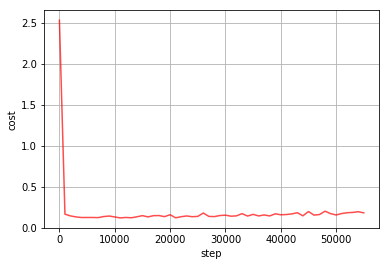

In [15]:
plt.plot(i_val[:],cost_val[:], c='r', alpha = 0.7)
plt.xlabel("step")
plt.ylabel("cost")
#plt.yscale('log')
plt.grid(True)